In [74]:
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

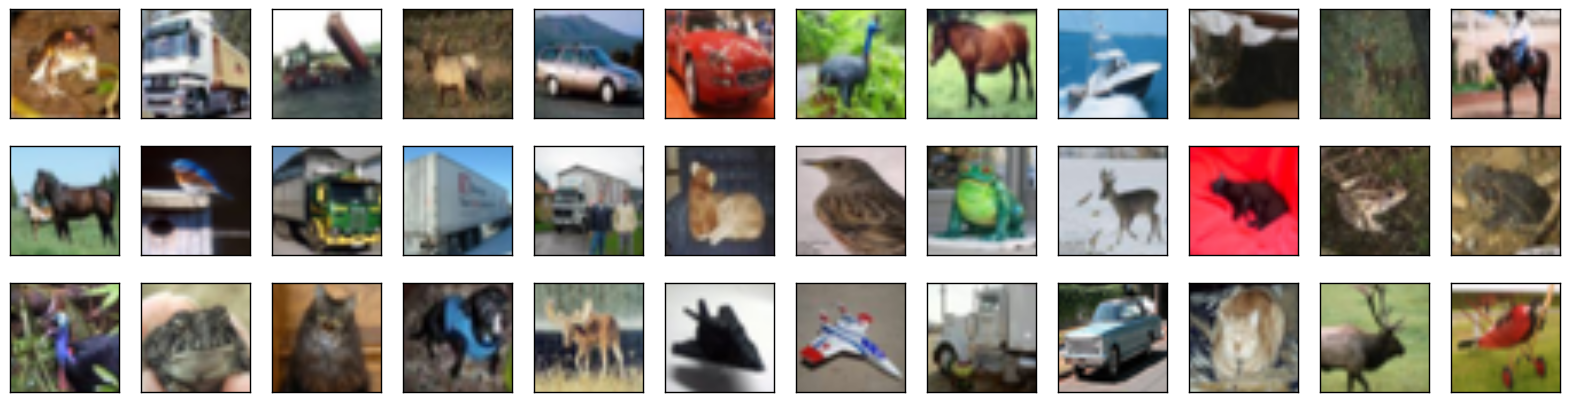

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(20,5))
for i in range(36):
    ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])#子图总行 子图总列 子图位置  去掉坐标轴
    ax.imshow(x_train[i])


In [76]:
#一样的
print(x_train[i].shape)
print((np.squeeze(x_train[i])).shape)#即把shape中为1的维度去掉，但是对非单维的维度不起作用

(32, 32, 3)
(32, 32, 3)


In [77]:
#缩放数据
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [78]:
#编码
from keras.utils import np_utils
from keras.utils import to_categorical
num_classes=len(np.unique(y_train))
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [79]:
#图像增强
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=10,#图像随机旋转的角度范围
                           width_shift_range=0.1,#在水平或者垂直方向上平移的范围
                           height_shift_range=0.1,
                           shear_range=0.2,#随机错切变换的角度
                           zoom_range=0.2,#随机缩放的范围
                           horizontal_flip=True,#随机将一半图像翻转
                           fill_mode='nearest')#用于填充新像素的方法
datagen.fit(x_train)

(12, 32, 32, 3)
12


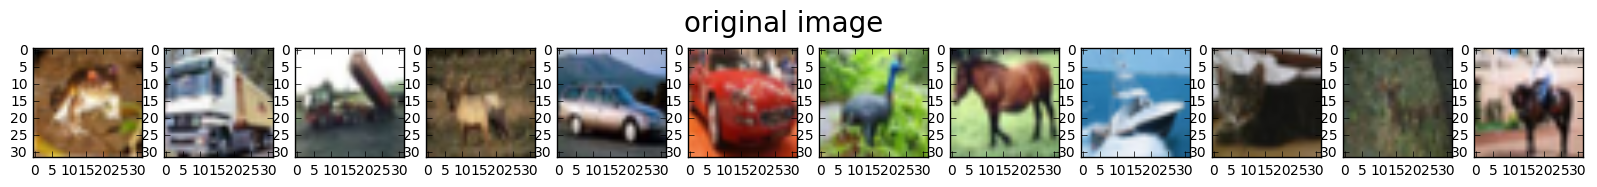

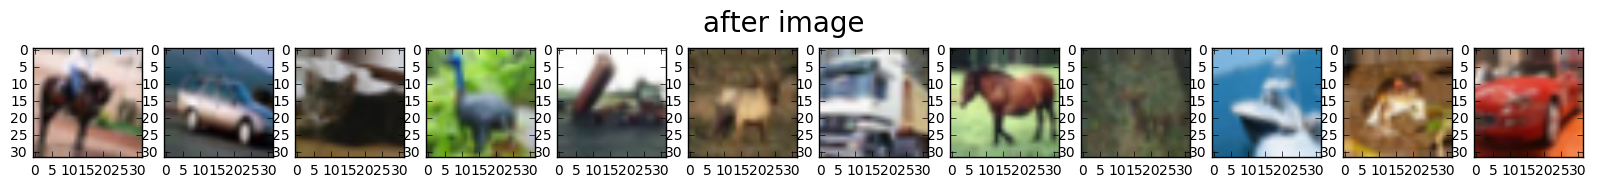

In [80]:
#可视化原始和增强图像
import matplotlib.pyplot as plt
x_train_subset=x_train[:12].copy()
print(x_train_subset.shape)
print(len(x_train_subset))

fig=plt.figure(figsize=(20,2))
for i in range(len(x_train_subset)):
    ax=fig.add_subplot(1,12,i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('original image',fontsize=20)
plt.show()

fig=plt.figure(figsize=(20,2))
for x_batch in datagen.flow(x_train_subset,batch_size=12):
    for i in range(len(x_train_subset)):
        ax=fig.add_subplot(1,12,i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('after image',fontsize=20)
    plt.show()
    break;

In [81]:
#CNN神经网络 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 64)          0         
__________

In [82]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
len(x_train)

50000

In [83]:
from keras.callbacks import ModelCheckpoint
batch_size=32
epochs=100

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]
checkpointer=ModelCheckpoint(filepath='aug_cifar.weights.best.hdf5',verbose=1,save_best_only=True)
model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),#datagen_train.flow来生成增强的图片，batch_size为一个批次
                   steps_per_epoch=x_train.shape[0]//batch_size,#当生成器返回steps_per_epoch次数据时计一个epoch结束，执行下一个epoch
                   epochs=epochs,verbose=1,callbacks=[checkpointer],
                   validation_data=(x_valid,y_valid),
                   validation_steps=x_valid.shape[0]//batch_size)

Epoch 1/10
1406/1406 [==============================] - 74s 52ms/step - loss: 1.6922 - acc: 0.3849 - val_loss: 1.3757 - val_acc: 0.4940

Epoch 00001: val_loss improved from inf to 1.37574, saving model to aug_cifar.weights.best.hdf5
Epoch 2/10
1406/1406 [==============================] - 74s 53ms/step - loss: 1.4274 - acc: 0.4873 - val_loss: 1.1812 - val_acc: 0.5720

Epoch 00002: val_loss improved from 1.37574 to 1.18120, saving model to aug_cifar.weights.best.hdf5
Epoch 3/10
1406/1406 [==============================] - 77s 55ms/step - loss: 1.3332 - acc: 0.5265 - val_loss: 1.1103 - val_acc: 0.6036

Epoch 00003: val_loss improved from 1.18120 to 1.11025, saving model to aug_cifar.weights.best.hdf5
Epoch 4/10
1406/1406 [==============================] - 79s 56ms/step - loss: 1.2671 - acc: 0.5522 - val_loss: 1.0400 - val_acc: 0.6304

Epoch 00004: val_loss improved from 1.11025 to 1.03995, saving model to aug_cifar.weights.best.hdf5
Epoch 5/10
1406/1406 [==============================] - 

In [84]:
model.load_weights('aug_cifar.weights.best.hdf5')
score=model.evaluate(x_test,y_test,verbose=1)

10000/10000 [==============================] - 4s 440us/step


In [85]:
score[1]

0.6568